# Step 1: Understand the Problem
The goal is to discover patterns in supermarket purchases, such as "People who buy milk often buy bread." We will use the Groceries Dataset, which contains transaction data.

# Step 2:1. Importing Libraries

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings("ignore")

# 2. Loading the Dataset

In [ ]:
#reading data
data = pd.read_csv('Groceries_dataset.csv')
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# 3. Exploratory Data Analysis (EDA)

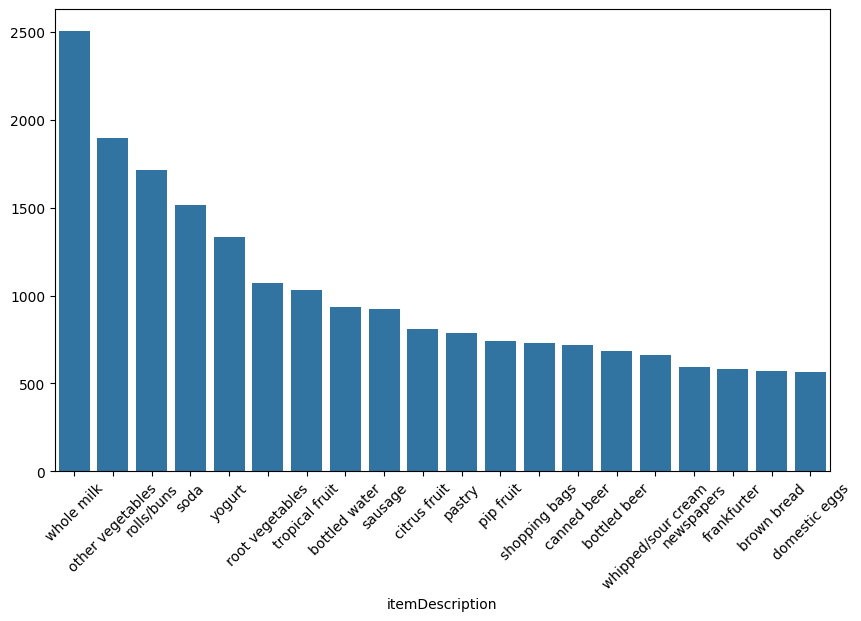

In [ ]:

x = data['itemDescription'].value_counts().sort_values(ascending=False)[:20]
plt.figure(figsize=(10,6))
sns.barplot(x=x.index, y=x.values)
plt.xticks(rotation=45)
plt.show()

# 4. Preprocessing the Data


In [ ]:
data['Quantity'] = 1
data

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


# Step 3: Preprocess the Data

In [ ]:
transactions =  data.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
transactions = transactions.fillna(0)
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5. Encoding the Data


In [ ]:
def encode(x):
    if x <=0:
        return 0
    elif x>=0:
        return 1
basket = transactions.applymap(encode)
basket

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6. Finding Frequent Itemsets


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemset = apriori(basket, min_support=0.06, use_colnames=True)
rules = association_rules(frequent_itemset, metric='lift', min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
1,(whole milk),(beef),0.458184,0.119548,0.064135,0.139978,1.170886,1.0,0.009360,1.023754,0.269364,0.124875,0.023203,0.338229
2,(other vegetables),(bottled beer),0.376603,0.158799,0.068497,0.181880,1.145345,1.0,0.008692,1.028212,0.203563,0.146703,0.027438,0.306610
3,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
4,(rolls/buns),(bottled beer),0.349666,0.158799,0.063109,0.180484,1.136555,1.0,0.007582,1.026461,0.184748,0.141705,0.025778,0.288950


# 7. Generating Association Rules


In [ ]:
confidence_threshold = 0.4
lift_threshold = 1
rules[(rules['confidence'] > confidence_threshold) & (rules['lift'] > lift_threshold)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,1.0,0.009360,1.168919,0.165762,0.124875,0.144508,0.338229
3,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,1.0,0.008692,1.096257,0.150857,0.146703,0.087805,0.306610
7,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,1.0,0.012669,1.172672,0.176297,0.160714,0.147247,0.362207
8,(bottled water),(other vegetables),0.213699,0.376603,0.093894,0.439376,1.166680,1.0,0.013414,1.111969,0.181695,0.189147,0.100694,0.344347
14,(bottled water),(whole milk),0.213699,0.458184,0.112365,0.525810,1.147597,1.0,0.014452,1.142615,0.163569,0.200825,0.124815,0.385526
18,(brown bread),(whole milk),0.135967,0.458184,0.069779,0.513208,1.120091,1.0,0.007481,1.113034,0.124087,0.133072,0.101554,0.332752
20,(butter),(whole milk),0.126475,0.458184,0.066188,0.523327,1.142176,1.0,0.008239,1.136661,0.142501,0.127660,0.120231,0.333892
22,(canned beer),(other vegetables),0.165213,0.376603,0.067214,0.406832,1.080267,1.0,0.004994,1.050962,0.089008,0.141622,0.048491,0.292653
25,(canned beer),(rolls/buns),0.165213,0.349666,0.066701,0.403727,1.154605,1.0,0.008931,1.090663,0.160404,0.148827,0.083127,0.297241
26,(canned beer),(whole milk),0.165213,0.458184,0.087224,0.527950,1.152268,1.0,0.011526,1.147795,0.158299,0.162679,0.128764,0.359160


# 8. Filtering Rules


In [ ]:
# recommend items based on single or multiple input item
def recommend_items(items, confidence_threshold=0.4, lift_threshold=1):
    if isinstance(items, str):
        # Select the rules that contain the input item as the antecedent and have a confidence greater than the threshold
        recommendations = rules.loc[(rules['antecedents'] == {items}) & (rules['confidence'] > confidence_threshold) & (rules['lift'] > lift_threshold)]
    if isinstance(items, list):
        recommendations = rules.loc[(rules['antecedents'].apply(lambda x: any(item in x for item in items))) & (rules['confidence'] > confidence_threshold)]
    # Extract the consequents of the selected rules as the recommended items
    recommended_items = recommendations['consequents'].apply(lambda x: list(x)).tolist()
    # Flatten the list of recommended items
    recommended_items = [item for sublist in recommended_items for item in sublist if item not in items]
    return list(set(recommended_items))

# 9. Recommending Items


In [ ]:

# recommend items for single i/p item
recommend_items("brown bread")


['whole milk']

# 10. Visualizing Association Rules


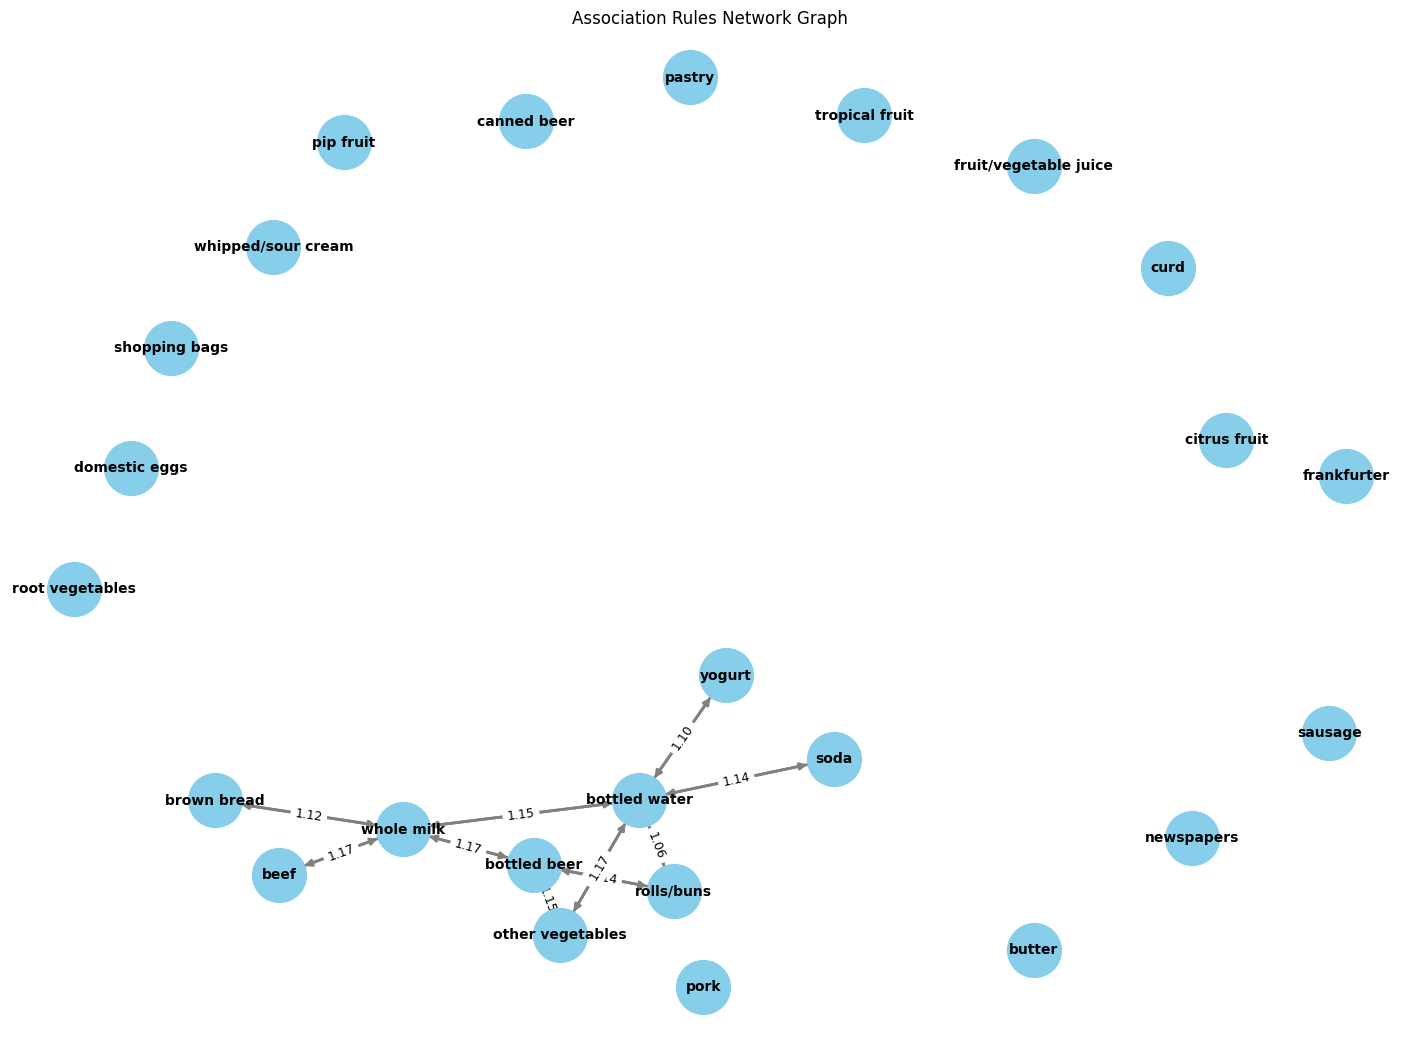

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_rules(rules, top_n=20):
    if rules.empty:
        print("No rules to visualize.")
        return

    # Create a directed graph
    graph = nx.DiGraph()

    # Add nodes for items
    all_items = set()
    for index, row in rules.iterrows():
        all_items.update(row['antecedents'])
        all_items.update(row['consequents'])
    for item in all_items:
        graph.add_node(item)

    # Add edges for rules with weights based on lift
    for index, row in rules.head(top_n).iterrows():
        antecedents = list(row['antecedents'])
        consequents = list(row['consequents'])
        lift = row['lift']
        for antecedent in antecedents:
            for consequent in consequents:
                graph.add_edge(antecedent, consequent, weight=lift)

    # Define node positions
    pos = nx.spring_layout(graph, k=0.5)  # Adjust k for better spacing

    # Draw nodes and edges
    plt.figure(figsize=(14, 10))
    nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue",
            font_size=10, font_weight="bold", width=2, edge_color='gray')

    # Draw edge labels (lift values)
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=9)

    plt.title("Association Rules Network Graph")
    plt.show()

# Example usage (assuming 'rules' is a DataFrame with the correct structure)
visualize_rules(rules)


# Step 7: Interpret Results
Analyze the top rules to understand customer purchasing behavior.

**Example Rules**:

Rule: (yogurt) → (bottled water)

Lift: 1.10

Interpretation: Customers who buy yogurt are 1.10 times more likely to buy whole milk.

Rule: (beef,bottled beer) → (whole milk)

Lift: 1.17

Interpretation: Customers who buy root vegetables and other vegetables are 1.17 times more likely to buy whole milk.